# Wallis图象锐化

In [2]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [3]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [36]:
def wallis_sharpen(src):
    rows,cols = src.shape[0],src.shape[1]
    rgb = np.float64(src) / 255
    dst =np.zeros_like(rgb)
    eps = 1.0
    for x in range(1,rows - 1):
        for y in range(1,cols - 1):
#             pixel_r = 46 * (5 * np.log(src[x,y,0] + 1) - np.log(src[x - 1,y,0] + 1) + np.log(src[x + 1,y,0] + 1) + np.log(src[x,y - 1,0] + 1) + np.log(src[x,y + 1,0] + 1))
#             dst[x,y,0] = pixel_r
#             pixel_g = 46 * (5 * np.log(src[x,y,1] + 1) - np.log(src[x - 1,y,1] + 1) + np.log(src[x + 1,y,1] + 1) + np.log(src[x,y - 1,1] + 1) + np.log(src[x,y + 1,1] + 1))
#             dst[x,y,1] = pixel_g
#             pixel_b = 46 * (5 * np.log(src[x,y,2] + 1) - np.log(src[x - 1,y,2] + 1) + np.log(src[x + 1,y,2] + 1) + np.log(src[x,y - 1,2] + 1) + np.log(src[x,y + 1,2] + 1))
#             dst[x,y,2] = pixel_b
            pixel = 46 * (5 * np.log(rgb[x,y] + eps) - (np.log(rgb[x - 1,y] + eps) + np.log(rgb[x + 1,y] + eps) +  np.log(rgb[x,y-1] + eps)) + np.log(rgb[x,y + 1] + eps)) 
            dst[x,y] = pixel
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    print(dst[:,:,0])
    return cv2.convertScaleAbs(dst)

In [37]:
dst = wallis_sharpen(src)
print(dst[:,:,0])
print(dst[:,:,1])

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         52.36063646 53.34623313 ... 52.85292906 51.73981016
   0.        ]
 [ 0.         52.23681405 53.34623313 ... 52.97674092 52.23580074
   0.        ]
 ...
 [ 0.         42.90995282 42.90995282 ... 54.68594731 54.68594731
   0.        ]
 [ 0.         42.38007621 42.38007621 ... 54.3213517  54.19949733
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[[ 0  0  0 ...  0  0  0]
 [ 0 52 53 ... 53 52  0]
 [ 0 52 53 ... 53 52  0]
 ...
 [ 0 43 43 ... 55 55  0]
 [ 0 42 42 ... 54 54  0]
 [ 0  0  0 ...  0  0  0]]
[[ 0  0  0 ...  0  0  0]
 [ 0 54 55 ... 54 53  0]
 [ 0 54 55 ... 55 54  0]
 ...
 [ 0 48 48 ... 61 61  0]
 [ 0 47 47 ... 61 61  0]
 [ 0  0  0 ...  0  0  0]]


Text(0.5,1,'Wallis Sharpen')

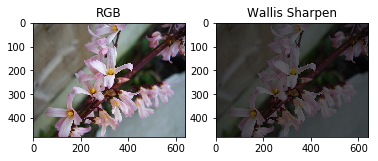

In [38]:
plt.subplot(121)
plt.imshow(src)
plt.title('RGB')
plt.subplot(122)
plt.imshow(dst)
plt.title('Wallis Sharpen')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45024363